In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_excel(r"C:\Users\pamuv\OneDrive\Desktop\price_movie.xlsx")

In [3]:
df.head()

,SI_No,Movie_name,Hero_popularity_index,Heroine_popularity_index,Genre,Director_previous_hits,trailer_views_in_Million,social_media_buzz_score,early_booking_rate,total_budget,num_distributors,num_foreign_distributors,screen_type,cinema_class,is_weekend_release,is_festival_release,days_until_festival,avg_ticket_price,languages_released
0,1,Adipurush,85,78,Mythological,4,1800,0.93,78.0,600.0,8,6,IMAX,Tier-1-Multiplex,True,False,0,450,"Hindi, Kannada, Malayalam, Tamil, Telugu"
1,2,Kalki 2898 AD,92,88,Sci-Fi_Fantasy,7,2500,0.98,87.0,600.0,10,8,IMAX,Tier-1-Multiplex,True,False,3,580,"Hindi, Kannada, Malayalam, Tamil, Telugu"
2,3,PS-2 (Ponniyin Selvan: Part 2),90,86,Historical_Period Drama,7,2300,0.97,85.0,550.0,9,7,IMAX,Tier-1-Multiplex,True,False,1,500,"Hindi, Kannada, Malayalam, Tamil, Telugu"
3,4,Pushpa 2: The Rule,91,87,Action_Adventure,6,2400,0.97,86.0,550.0,9,7,IMAX,Tier-1-Multiplex,True,False,1,560,"Hindi, Kannada, Malayalam, Tamil, Telugu"
4,5,Brahmastra Part One: Shiva,88,85,Sci-Fi_Fantasy,6,1500,0.95,70.0,500.0,8,6,4DX,Tier-1-Multiplex,True,True,0,500,"Hindi, Kannada, Malayalam, Tamil, Telugu"


In [4]:
df.shape

(414, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SI_No                     414 non-null    int64  
 1   Movie_name                414 non-null    object 
 2   Hero_popularity_index     414 non-null    int64  
 3   Heroine_popularity_index  414 non-null    int64  
 4   Genre                     414 non-null    object 
 5   Director_previous_hits    414 non-null    int64  
 6   trailer_views_in_Million  414 non-null    int64  
 7   social_media_buzz_score   414 non-null    float64
 8   early_booking_rate        414 non-null    float64
 9   total_budget              414 non-null    float64
 10  num_distributors          414 non-null    int64  
 11  num_foreign_distributors  414 non-null    int64  
 12  screen_type               414 non-null    object 
 13  cinema_class              414 non-null    object 
 14  is_weekend

In [6]:
cols = ['Movie_name', 'Genre', 'screen_type', 'cinema_class', 'languages_released']
df[cols] = df[cols].astype("string")

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

SI_No                       0
Movie_name                  0
Hero_popularity_index       0
Heroine_popularity_index    0
Genre                       0
Director_previous_hits      0
trailer_views_in_Million    0
social_media_buzz_score     0
early_booking_rate          0
total_budget                0
num_distributors            0
num_foreign_distributors    0
screen_type                 0
cinema_class                0
is_weekend_release          0
is_festival_release         0
days_until_festival         0
avg_ticket_price            0
languages_released          0
dtype: int64

In [9]:
newdf=df[df['early_booking_rate']<1][['SI_No','early_booking_rate']]
print(newdf)

     SI_No  early_booking_rate
53      54                0.75
54      55                0.80
60      61                0.78
67      68                0.70
68      69                0.74
..     ...                 ...
365    366                0.74
366    367                0.62
401    402                0.30
402    403                0.45
413    414                0.50

[82 rows x 2 columns]


In [10]:
df.loc[df['early_booking_rate'] < 1, 'early_booking_rate'] *= 100
newdf2=df[df['early_booking_rate']<1][['SI_No','early_booking_rate']]
print(newdf2)


Empty DataFrame
Columns: [SI_No, early_booking_rate]
Index: []


In [11]:
df.loc[df['avg_ticket_price'] > 500, 'avg_ticket_price'] = 500
df['avg_ticket_price'].max()

500

In [12]:
df.drop(columns=['SI_No'], inplace=True)
df.head()

,Movie_name,Hero_popularity_index,Heroine_popularity_index,Genre,Director_previous_hits,trailer_views_in_Million,social_media_buzz_score,early_booking_rate,total_budget,num_distributors,num_foreign_distributors,screen_type,cinema_class,is_weekend_release,is_festival_release,days_until_festival,avg_ticket_price,languages_released
0,Adipurush,85,78,Mythological,4,1800,0.93,78.0,600.0,8,6,IMAX,Tier-1-Multiplex,True,False,0,450,"Hindi, Kannada, Malayalam, Tamil, Telugu"
1,Kalki 2898 AD,92,88,Sci-Fi_Fantasy,7,2500,0.98,87.0,600.0,10,8,IMAX,Tier-1-Multiplex,True,False,3,500,"Hindi, Kannada, Malayalam, Tamil, Telugu"
2,PS-2 (Ponniyin Selvan: Part 2),90,86,Historical_Period Drama,7,2300,0.97,85.0,550.0,9,7,IMAX,Tier-1-Multiplex,True,False,1,500,"Hindi, Kannada, Malayalam, Tamil, Telugu"
3,Pushpa 2: The Rule,91,87,Action_Adventure,6,2400,0.97,86.0,550.0,9,7,IMAX,Tier-1-Multiplex,True,False,1,500,"Hindi, Kannada, Malayalam, Tamil, Telugu"
4,Brahmastra Part One: Shiva,88,85,Sci-Fi_Fantasy,6,1500,0.95,70.0,500.0,8,6,4DX,Tier-1-Multiplex,True,True,0,500,"Hindi, Kannada, Malayalam, Tamil, Telugu"


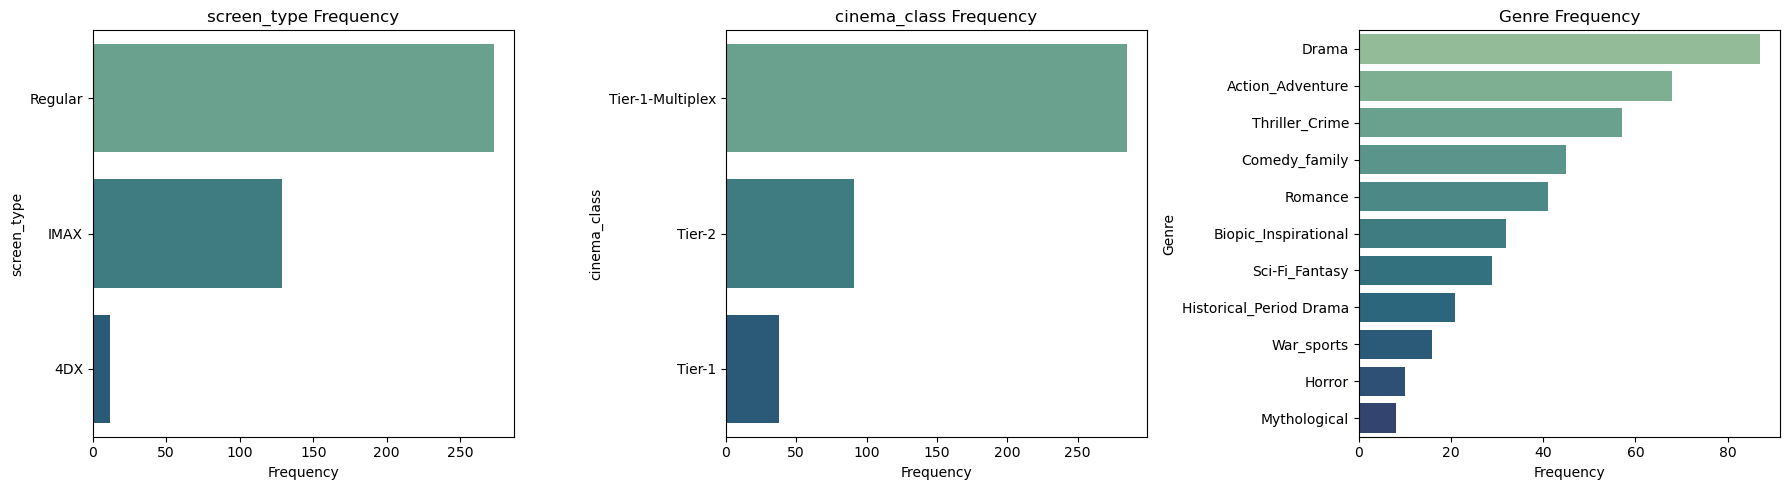

In [13]:
cols = ['screen_type', 'cinema_class', 'Genre']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, cols):
    counts = df[col].value_counts()
    sns.barplot(
        x=counts.values,
        y=counts.index,
        hue=counts.index,       
        palette='crest',
        legend=False,
        ax=ax
    )
    ax.set_title(f'{col} Frequency')
    ax.set_xlabel('Frequency')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

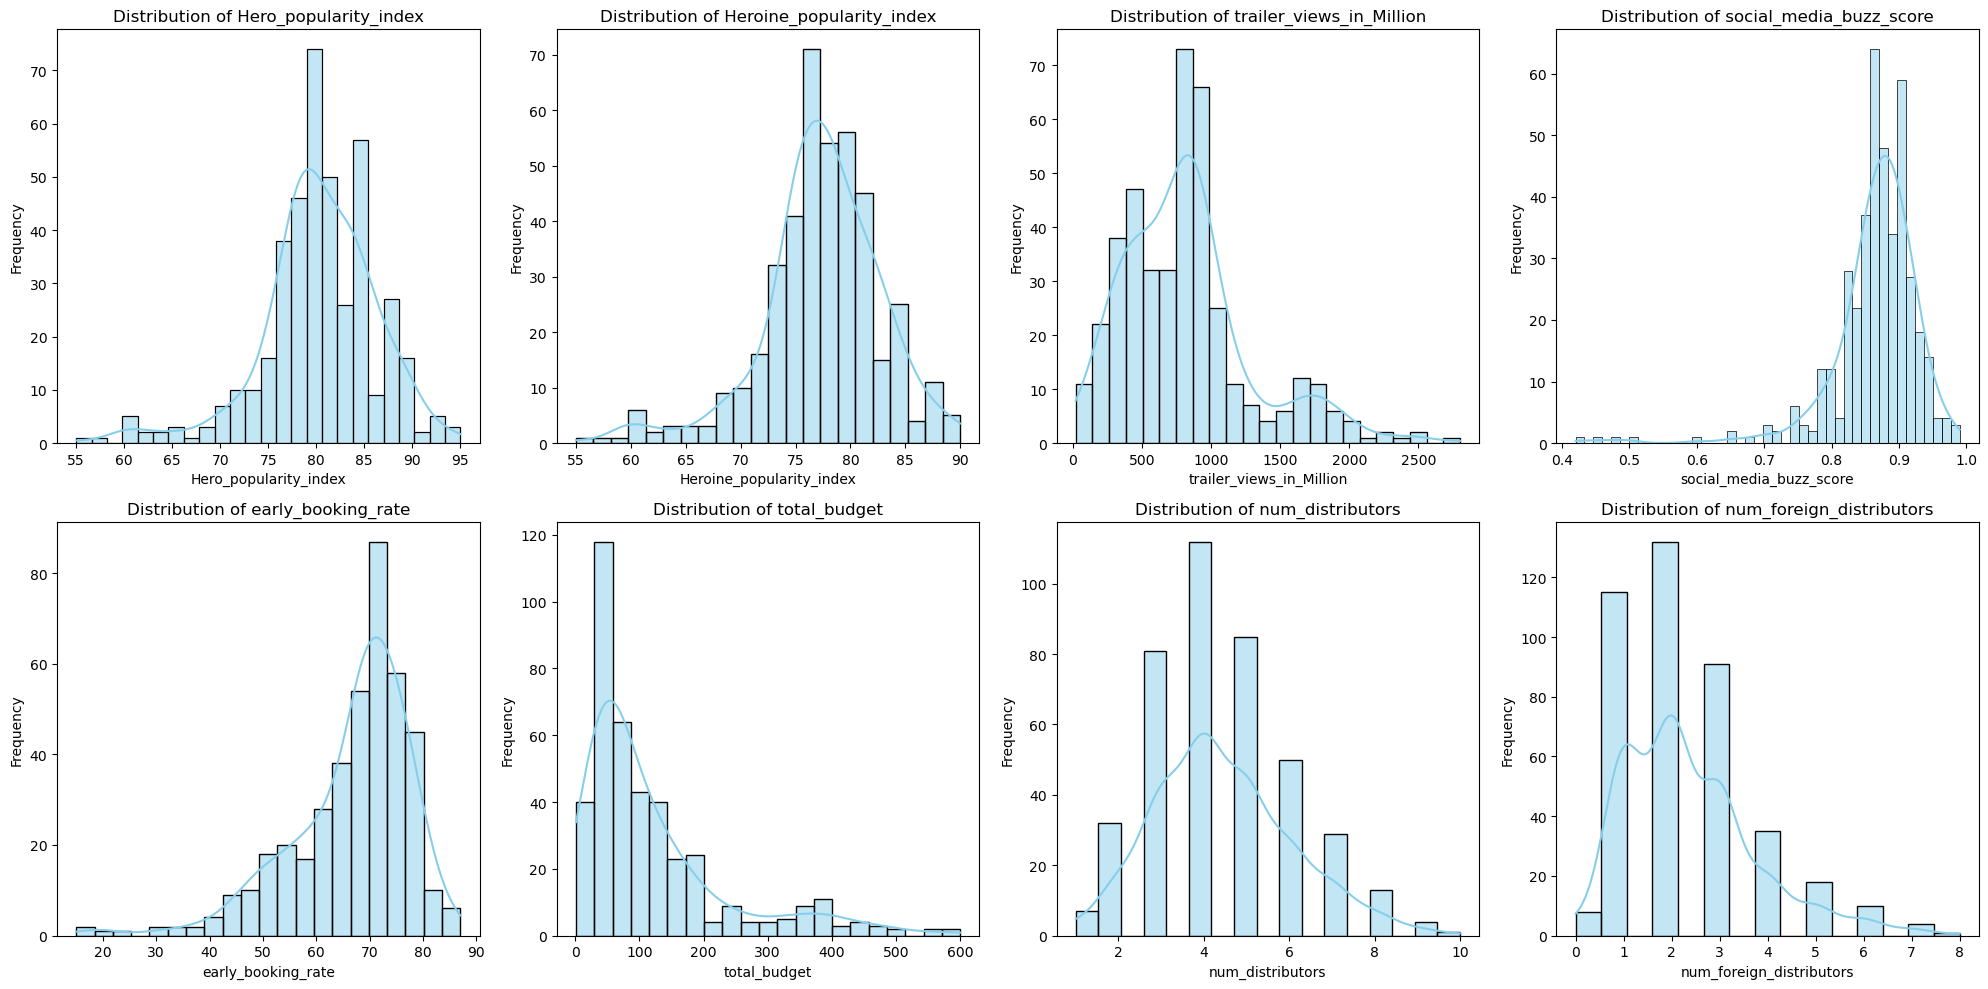

In [14]:
cols = [
    'Hero_popularity_index',
    'Heroine_popularity_index',
    'trailer_views_in_Million',
    'social_media_buzz_score',
    'early_booking_rate',
    'total_budget',
    'num_distributors',
    'num_foreign_distributors',
]

# Set up the grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


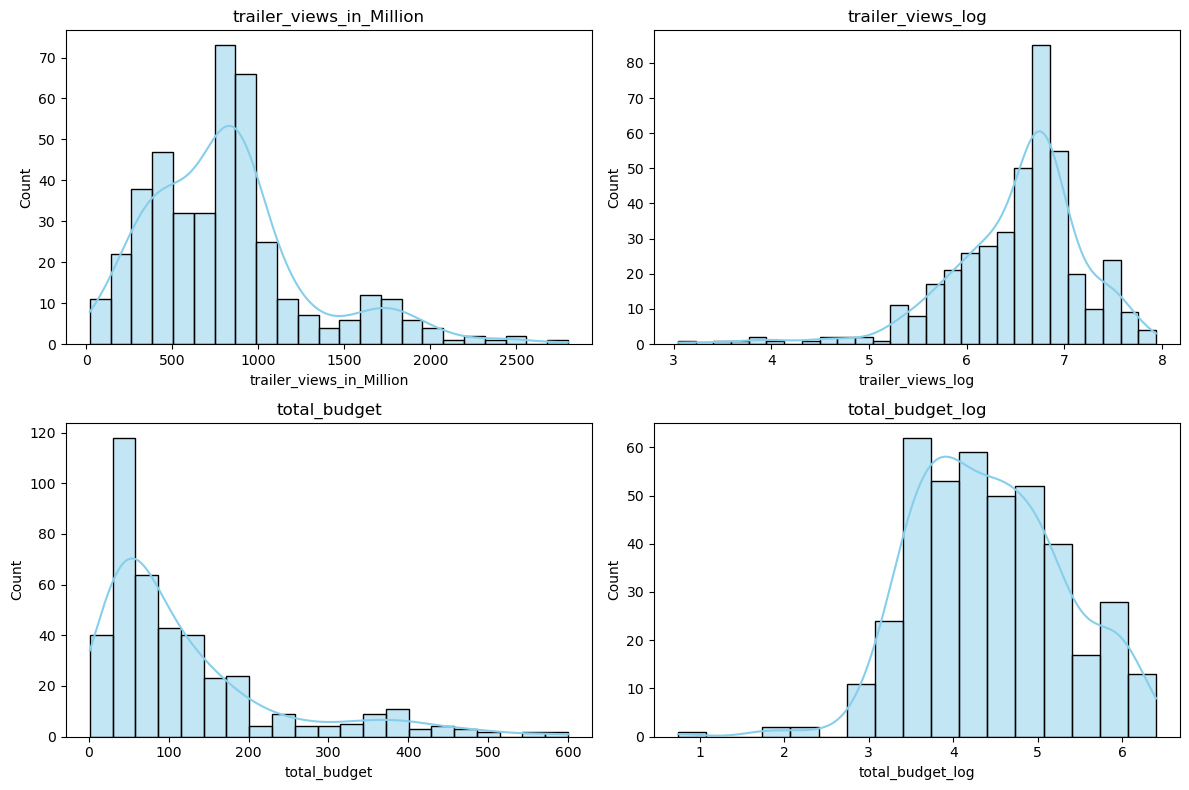

In [15]:
#trailer view and total budget is more right skewed so log transform
#rest leftsqued data if squared it may reude left squeness but it will worse the left most data where data is maximum


# Apply log1p (i.e., log(1 + x)) to avoid issues with zeros
df['trailer_views_log'] = np.log1p(df['trailer_views_in_Million'])
df['total_budget_log'] = np.log1p(df['total_budget'])

cols = ['trailer_views_in_Million', 'trailer_views_log', 'total_budget', 'total_budget_log']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

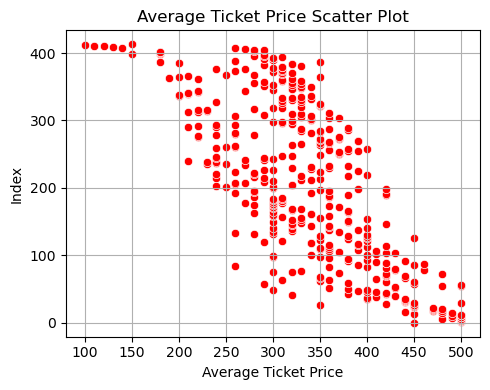

In [16]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x=df['avg_ticket_price'], y=df.index , color='red')
plt.title('Average Ticket Price Scatter Plot')
plt.ylabel('Index')
plt.xlabel('Average Ticket Price')
plt.grid(True)
plt.tight_layout()
plt.show 


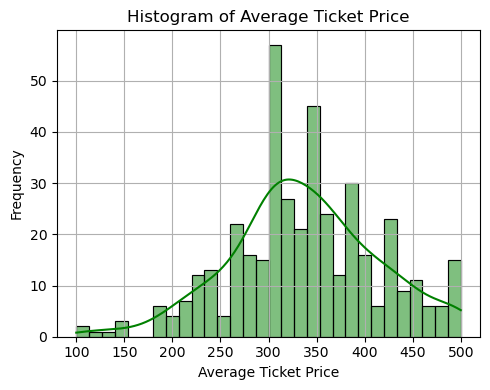

In [17]:
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x='avg_ticket_price', bins=30, kde=True, color='green')
plt.title('Histogram of Average Ticket Price')
plt.xlabel('Average Ticket Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

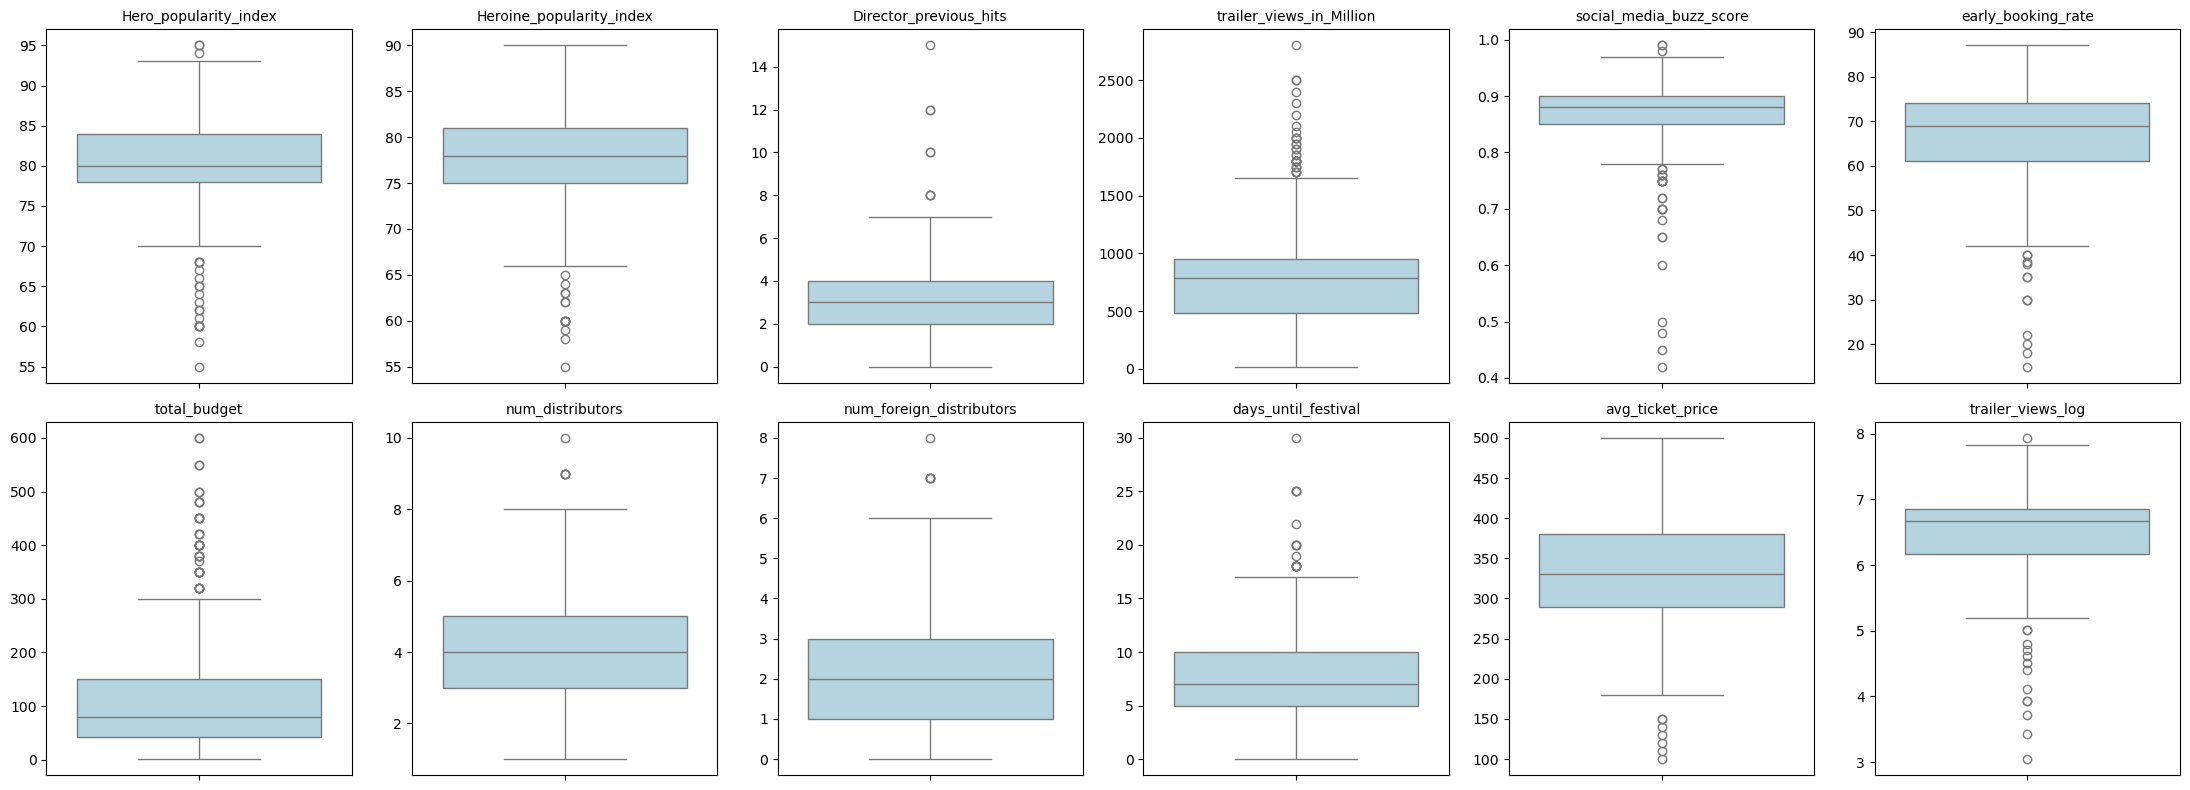

In [18]:
def boxplots_vertical_grid(df):
    numeric_cols = df.select_dtypes(include='number').columns
    num_plots = len(numeric_cols)
    
    rows, cols = 2, 6
    plt.figure(figsize=(22, 8))  
    
    for i, col in enumerate(numeric_cols):
        if i >= rows * cols:
            break 
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(data=df, y=col, color='lightblue')  
        plt.title(f'{col}', fontsize=10)
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Call the function
boxplots_vertical_grid(df)


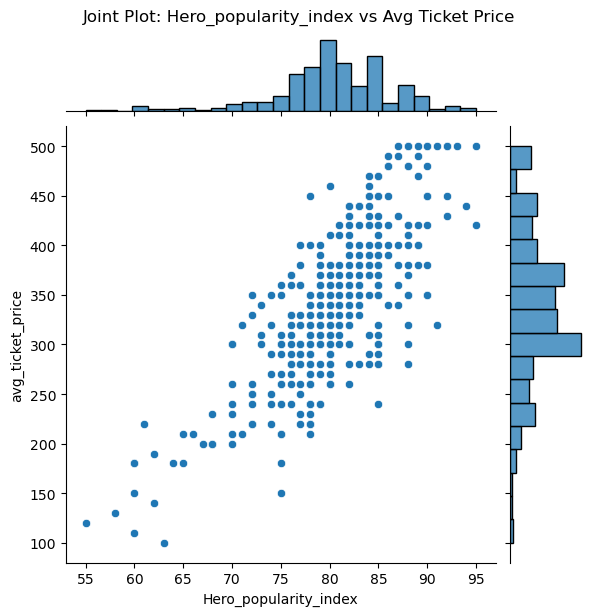

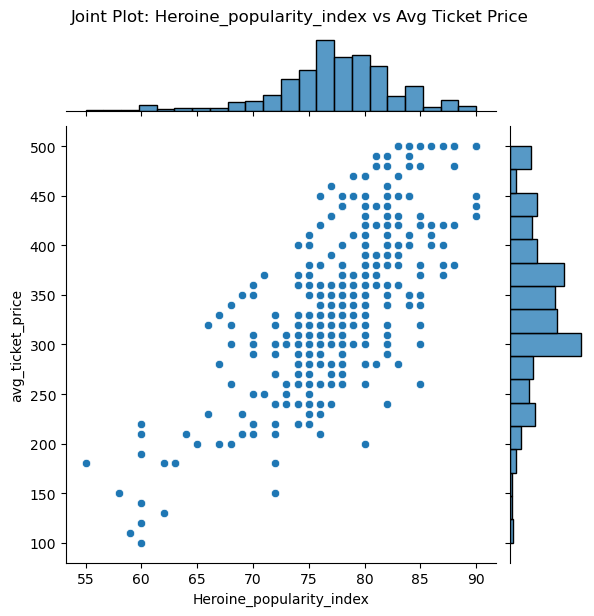

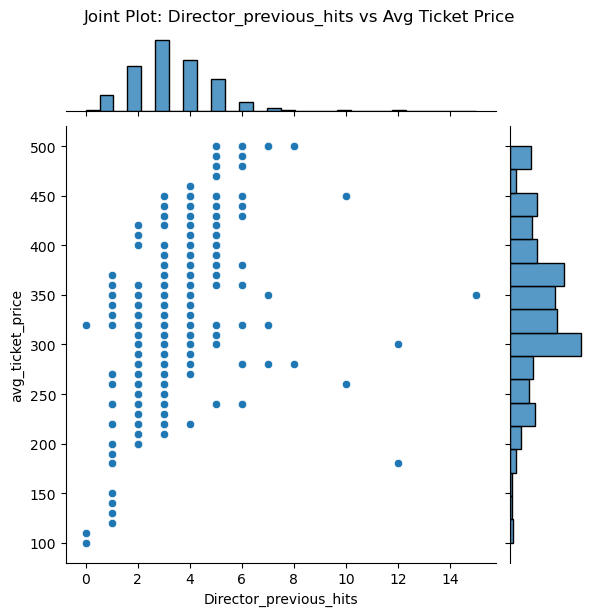

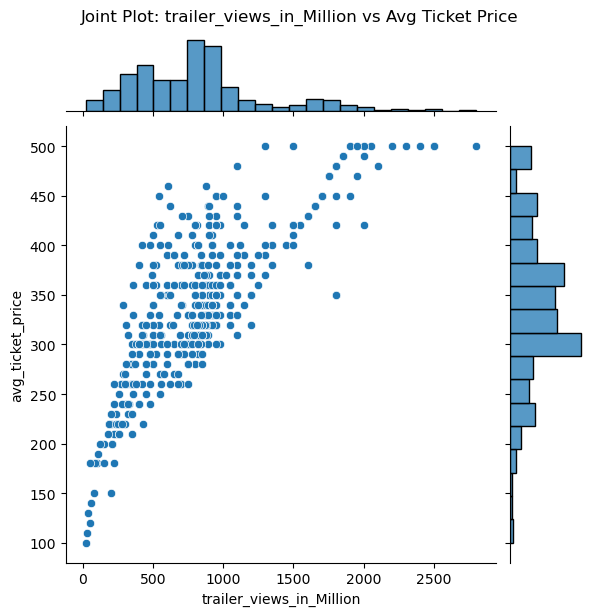

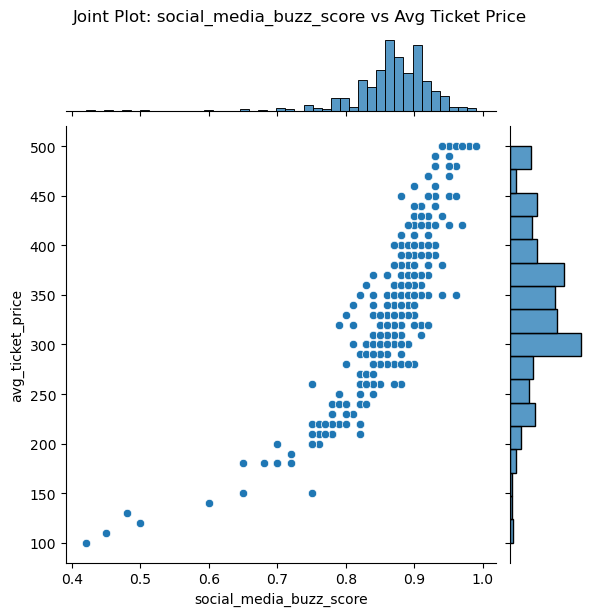

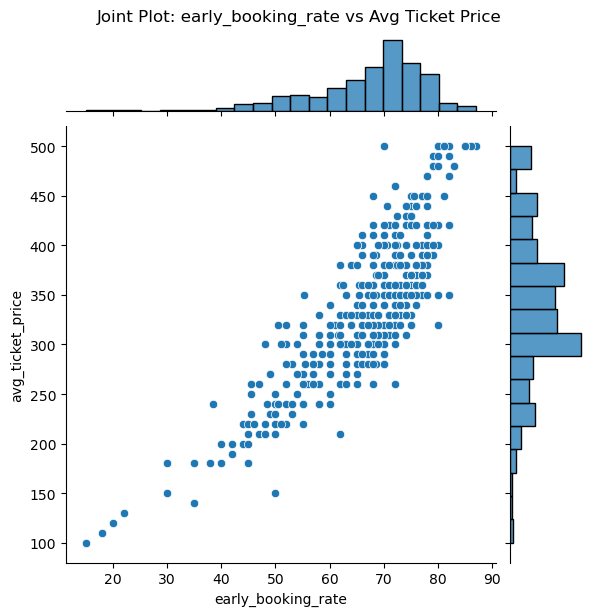

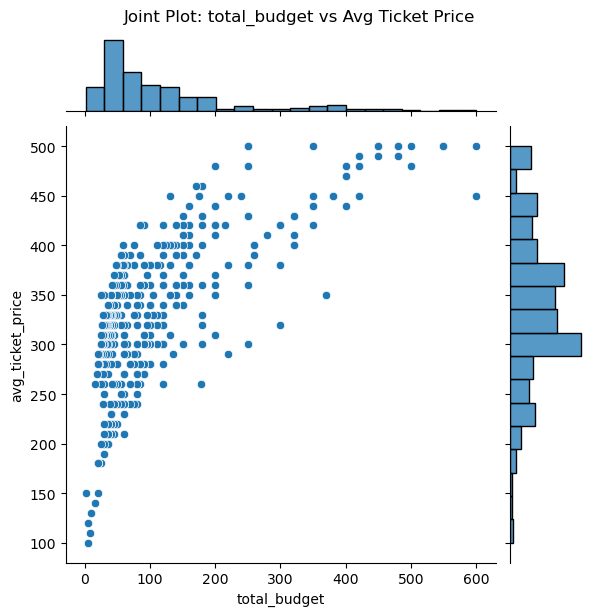

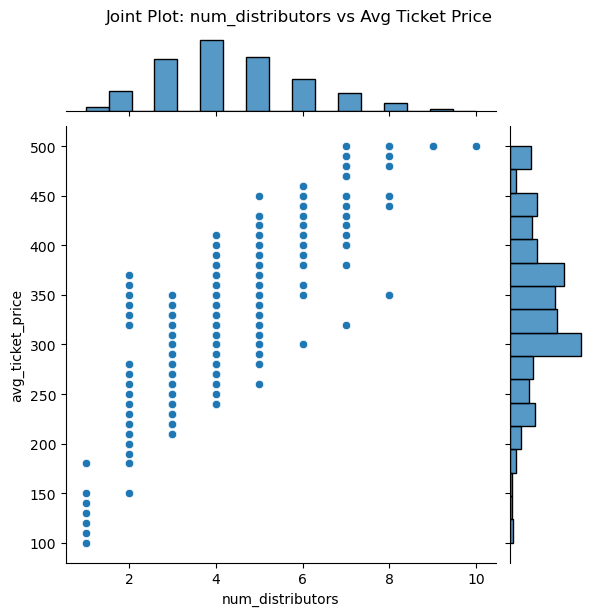

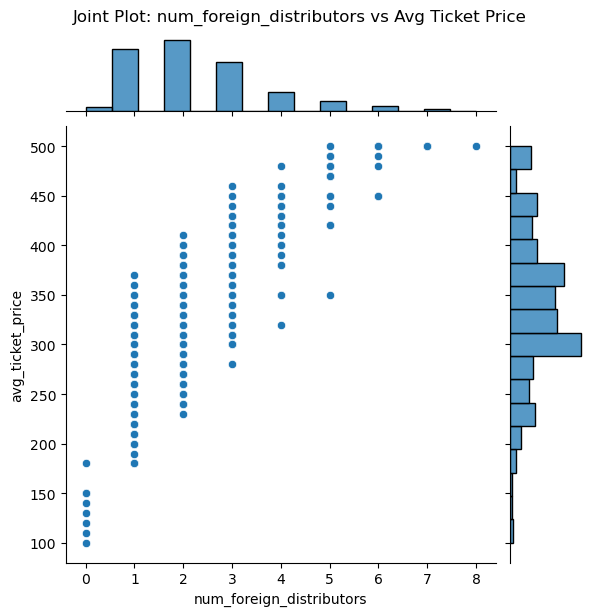

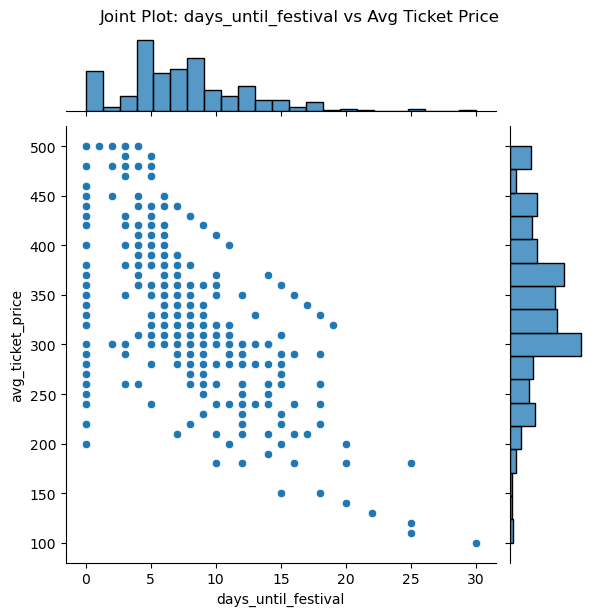

In [19]:
# List of features to compare with avg_ticket_price
features = [
    'Hero_popularity_index', 'Heroine_popularity_index', 'Director_previous_hits',
    'trailer_views_in_Million', 'social_media_buzz_score', 'early_booking_rate',
    'total_budget', 'num_distributors', 'num_foreign_distributors', 'days_until_festival'
]

# Joint plots of each feature with avg_ticket_price
for col in features:
    sns.jointplot(data=df, x=col, y='avg_ticket_price', kind='scatter', height=6)
    plt.suptitle(f'Joint Plot: {col} vs Avg Ticket Price', y=1.02)
    plt.show()


In [20]:
#from univarite and bivarite analysis director hits  is abnormal so lets not take that while trainng OUTLINER, 

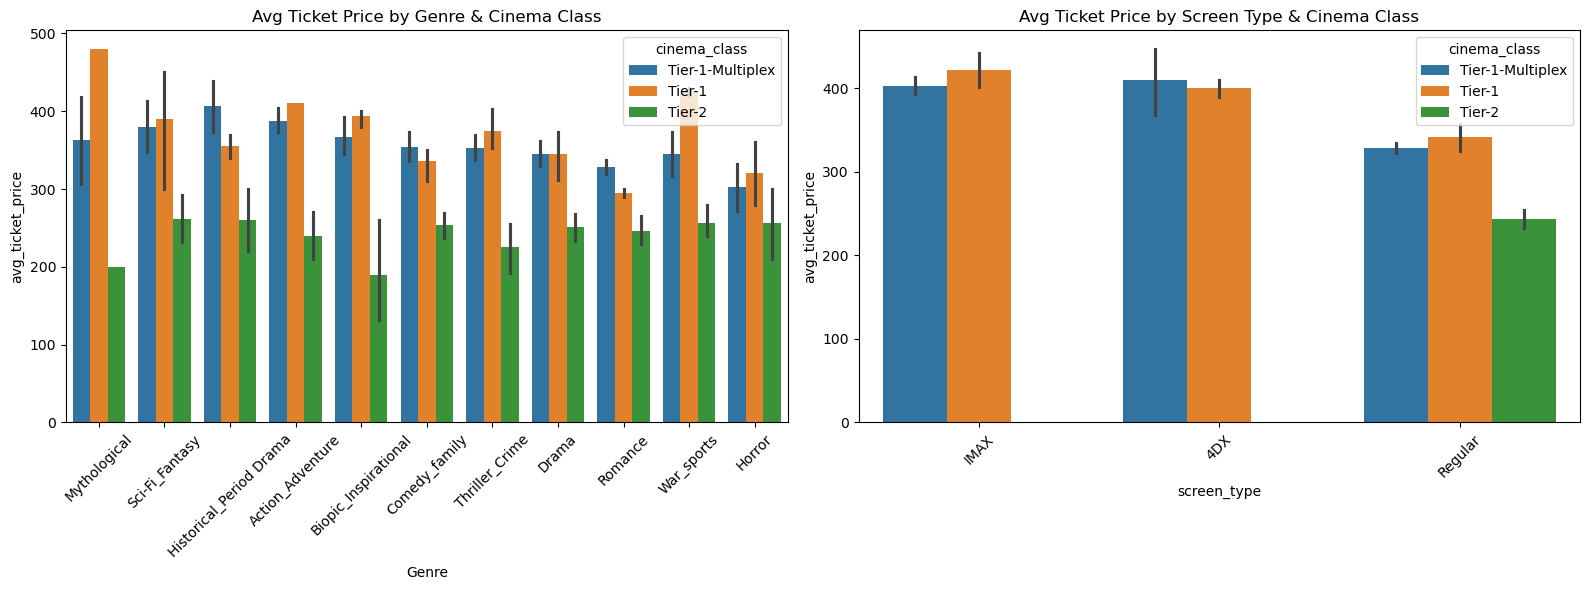

In [21]:
plt.figure(figsize=(16, 6))

# Plot 1: Genre vs avg_ticket_price with cinema_class as hue 
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Genre', y='avg_ticket_price',hue='cinema_class')
plt.title('Avg Ticket Price by Genre & Cinema Class')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot 2: Screen Type vs avg_ticket_price with cinema_class as hue
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='screen_type', y='avg_ticket_price', hue='cinema_class', estimator='mean')
plt.title('Avg Ticket Price by Screen Type & Cinema Class')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


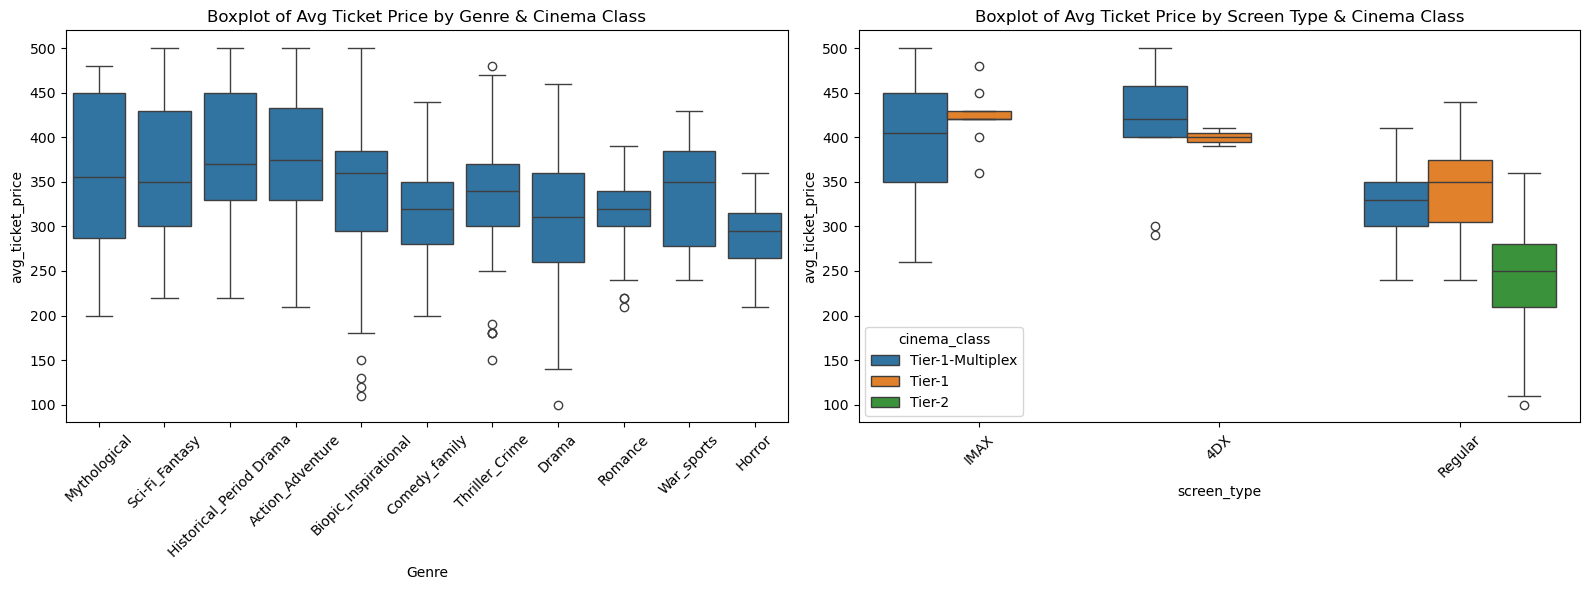

In [22]:
plt.figure(figsize=(16, 6))

# Boxplot 1: Genre vs avg_ticket_price
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Genre', y='avg_ticket_price')
plt.title('Boxplot of Avg Ticket Price by Genre & Cinema Class')
plt.xticks(rotation=45)
plt.tight_layout()

# Boxplot 2: Screen Type vs avg_ticket_price
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='screen_type', y='avg_ticket_price', hue='cinema_class')
plt.title('Boxplot of Avg Ticket Price by Screen Type & Cinema Class')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

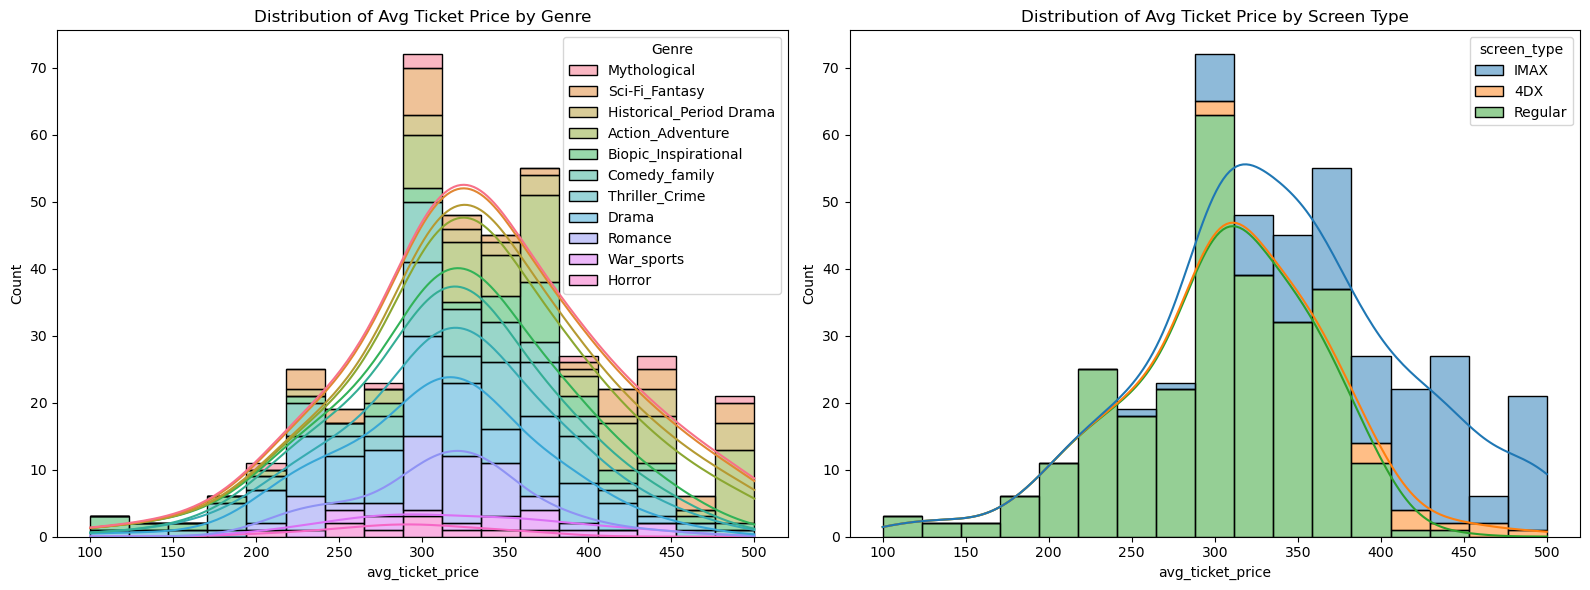

In [23]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='avg_ticket_price', hue='Genre', kde=True, multiple='stack')
plt.title('Distribution of Avg Ticket Price by Genre')

# Distplot 2: Screen Type
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='avg_ticket_price', hue='screen_type', kde=True, multiple='stack')
plt.title('Distribution of Avg Ticket Price by Screen Type')

plt.tight_layout()
plt.show()

In [24]:
# Strip whitespace, split by ',' and count the number of languages
df['num_languages'] = df['languages_released'].apply(lambda x: len(x.split(',')))
df['is_weekend_release'] = df['is_weekend_release'].astype(int)
df['is_festival_release'] = df['is_festival_release'].astype(int)

df.sample(5)


,Movie_name,Hero_popularity_index,Heroine_popularity_index,Genre,Director_previous_hits,trailer_views_in_Million,social_media_buzz_score,early_booking_rate,total_budget,num_distributors,...,screen_type,cinema_class,is_weekend_release,is_festival_release,days_until_festival,avg_ticket_price,languages_released,trailer_views_log,total_budget_log,num_languages
89,Gully Boy 2,84,82,Drama,5,800,0.90,72.0,160.0,7,...,IMAX,Tier-1-Multiplex,1,1,0,420,"English, Hindi",6.685861,5.081404,2
154,Tu Jhoothi Main Makkaar,82,84,Comedy_family,4,1050,0.90,76.0,110.0,5,...,IMAX,Tier-1-Multiplex,1,0,5,400,Hindi,6.957497,4.709530,1
76,Khuda Haafiz Chapter 3,76,74,Drama,3,620,0.85,61.0,180.0,4,...,Regular,Tier-1-Multiplex,1,0,7,320,Hindi,6.431331,5.198497,1
207,Vasantam,75,72,Comedy_family,3,290,0.83,54.0,80.0,4,...,Regular,Tier-2,1,0,8,270,"Hindi, Kannada",5.673323,4.394449,2
228,Good Newwz,82,84,Comedy_family,3,950,0.88,72.0,65.0,4,...,IMAX,Tier-1-Multiplex,1,0,7,340,Hindi,6.857514,4.189655,1


In [25]:
df.describe()

,Hero_popularity_index,Heroine_popularity_index,Director_previous_hits,trailer_views_in_Million,social_media_buzz_score,early_booking_rate,total_budget,num_distributors,num_foreign_distributors,is_weekend_release,is_festival_release,days_until_festival,avg_ticket_price,trailer_views_log,total_budget_log,num_languages
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,80.265700,77.396135,3.461353,818.260870,0.865411,66.582609,120.886715,4.444444,2.362319,0.753623,0.096618,7.502415,336.714976,6.520471,4.423916,1.884058
std,6.023516,5.498632,1.685202,469.584711,0.066217,11.284041,116.280467,1.617266,1.375725,0.431422,0.295795,4.850176,76.793052,0.686218,0.877327,1.313402
min,55.000000,55.000000,0.000000,20.000000,0.420000,15.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,3.044522,0.741937,1.000000
25%,78.000000,75.000000,2.000000,480.000000,0.850000,61.125000,42.000000,3.000000,1.000000,1.000000,0.000000,5.000000,290.000000,6.175867,3.761200,1.000000
50%,80.000000,78.000000,3.000000,785.000000,0.880000,69.000000,80.000000,4.000000,2.000000,1.000000,0.000000,7.000000,330.000000,6.666937,4.394449,1.000000
75%,84.000000,81.000000,4.000000,950.000000,0.900000,74.000000,150.000000,5.000000,3.000000,1.000000,0.000000,10.000000,380.000000,6.857514,5.017280,2.000000
max,95.000000,90.000000,15.000000,2800.000000,0.990000,87.000000,600.000000,10.000000,8.000000,1.000000,1.000000,30.000000,500.000000,7.937732,6.398595,5.000000


In [26]:
df.corr(numeric_only=True)

,Hero_popularity_index,Heroine_popularity_index,Director_previous_hits,trailer_views_in_Million,social_media_buzz_score,early_booking_rate,total_budget,num_distributors,num_foreign_distributors,is_weekend_release,is_festival_release,days_until_festival,avg_ticket_price,trailer_views_log,total_budget_log,num_languages
Hero_popularity_index,1.000000,0.907553,0.590667,0.650006,0.854463,0.788699,0.549852,0.777997,0.735489,0.478080,0.090197,-0.613904,0.771944,0.759378,0.618590,0.369641
Heroine_popularity_index,0.907553,1.000000,0.567114,0.557368,0.804342,0.744484,0.478556,0.719391,0.664679,0.407669,0.080619,-0.558757,0.722847,0.683007,0.551829,0.280293
Director_previous_hits,0.590667,0.567114,1.000000,0.465729,0.535009,0.397440,0.549024,0.708166,0.675514,0.293268,0.221236,-0.499149,0.543667,0.466808,0.571204,0.439929
trailer_views_in_Million,0.650006,0.557368,0.465729,1.000000,0.693161,0.778230,0.663444,0.657644,0.735631,0.496270,-0.070258,-0.400695,0.794469,0.879410,0.551513,0.486247
social_media_buzz_score,0.854463,0.804342,0.535009,0.693161,1.000000,0.913394,0.498832,0.736505,0.691027,0.540912,0.040000,-0.683917,0.837413,0.883476,0.623930,0.303457
early_booking_rate,0.788699,0.744484,0.397440,0.778230,0.913394,1.000000,0.437236,0.643668,0.625865,0.559509,-0.076391,-0.558329,0.842084,0.913854,0.490418,0.211909
total_budget,0.549852,0.478556,0.549024,0.663444,0.498832,0.437236,1.000000,0.807901,0.843966,0.292701,0.095355,-0.418543,0.729358,0.514446,0.888969,0.608906
num_distributors,0.777997,0.719391,0.708166,0.657644,0.736505,0.643668,0.807901,1.000000,0.944981,0.421062,0.147908,-0.669977,0.842706,0.631677,0.847062,0.509920
num_foreign_distributors,0.735489,0.664679,0.675514,0.735631,0.691027,0.625865,0.843966,0.944981,1.000000,0.420020,0.122021,-0.610855,0.834545,0.633101,0.818883,0.582106
is_weekend_release,0.478080,0.407669,0.293268,0.496270,0.540912,0.559509,0.292701,0.421062,0.420020,1.000000,-0.078646,-0.510019,0.582113,0.588372,0.346487,0.240041


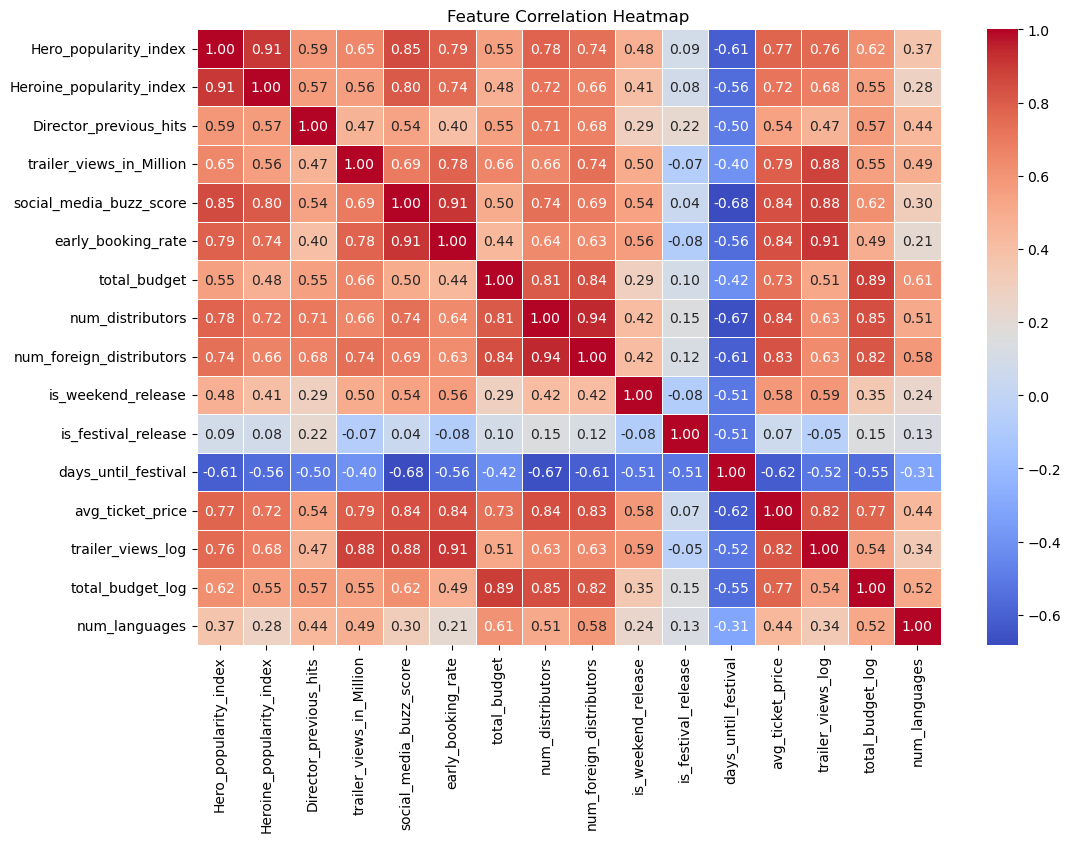

In [27]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
#manuel label encodding
# Manual ordinal mapping for screen_type
screen_type_map = {
    'Regular': 0,
    'IMAX': 1,
    '4DX': 2
}
df['screen_type_encoded'] = df['screen_type'].map(screen_type_map)

# Manual ordinal mapping for cinema_class
cinema_class_map = {
    'Tier-2': 0,
    'Tier-1': 1,
    'Tier-1-Multiplex': 2
}
df['cinema_class_encoded'] = df['cinema_class'].map(cinema_class_map)
df.head()



,Movie_name,Hero_popularity_index,Heroine_popularity_index,Genre,Director_previous_hits,trailer_views_in_Million,social_media_buzz_score,early_booking_rate,total_budget,num_distributors,...,is_weekend_release,is_festival_release,days_until_festival,avg_ticket_price,languages_released,trailer_views_log,total_budget_log,num_languages,screen_type_encoded,cinema_class_encoded
0,Adipurush,85,78,Mythological,4,1800,0.93,78.0,600.0,8,...,1,0,0,450,"Hindi, Kannada, Malayalam, Tamil, Telugu",7.496097,6.398595,5,1,2
1,Kalki 2898 AD,92,88,Sci-Fi_Fantasy,7,2500,0.98,87.0,600.0,10,...,1,0,3,500,"Hindi, Kannada, Malayalam, Tamil, Telugu",7.824446,6.398595,5,1,2
2,PS-2 (Ponniyin Selvan: Part 2),90,86,Historical_Period Drama,7,2300,0.97,85.0,550.0,9,...,1,0,1,500,"Hindi, Kannada, Malayalam, Tamil, Telugu",7.741099,6.311735,5,1,2
3,Pushpa 2: The Rule,91,87,Action_Adventure,6,2400,0.97,86.0,550.0,9,...,1,0,1,500,"Hindi, Kannada, Malayalam, Tamil, Telugu",7.783641,6.311735,5,1,2
4,Brahmastra Part One: Shiva,88,85,Sci-Fi_Fantasy,6,1500,0.95,70.0,500.0,8,...,1,1,0,500,"Hindi, Kannada, Malayalam, Tamil, Telugu",7.313887,6.216606,5,2,2


In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder( sparse_output=False)
genre_encoded = encoder.fit_transform(df[['Genre']])
df_encoded = pd.concat([df.drop('Genre', axis=1), 
                       pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['Genre']))], 
                       axis=1)
encoder.get_feature_names_out(['Genre'])

array(['Genre_Action_Adventure', 'Genre_Biopic_Inspirational',
       'Genre_Comedy_family', 'Genre_Drama',
       'Genre_Historical_Period Drama', 'Genre_Horror',
       'Genre_Mythological', 'Genre_Romance', 'Genre_Sci-Fi_Fantasy',
       'Genre_Thriller_Crime', 'Genre_War_sports'], dtype=object)

In [30]:
dropcol = [
    'Movie_name',
    'Director_previous_hits',
    'total_budget',
    'trailer_views_in_Million',
    'screen_type',
    'cinema_class',
    'languages_released',
    'days_until_festival'
]

# Drop only if columns exist
df_encoded = df_encoded.drop(columns=dropcol, errors='ignore')

# Move 'avg_ticket_price' to the end if it exists
if 'avg_ticket_price' in df_encoded.columns:
    target_col = df_encoded['avg_ticket_price']
    df_encoded = df_encoded.drop(columns=['avg_ticket_price'])
    df_encoded['avg_ticket_price'] = target_col


In [31]:
df_encoded.sample(5)

,Hero_popularity_index,Heroine_popularity_index,social_media_buzz_score,early_booking_rate,num_distributors,num_foreign_distributors,is_weekend_release,is_festival_release,trailer_views_log,total_budget_log,...,Genre_Comedy_family,Genre_Drama,Genre_Historical_Period Drama,Genre_Horror,Genre_Mythological,Genre_Romance,Genre_Sci-Fi_Fantasy,Genre_Thriller_Crime,Genre_War_sports,avg_ticket_price
63,80,75,0.87,65.5,5,3,1,0,6.538140,5.303305,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,310
224,90,85,0.96,80.0,5,3,1,0,7.496097,4.262680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,350
158,77,76,0.88,67.0,5,3,0,0,5.888878,4.615121,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,360
152,80,78,0.87,62.0,5,2,0,0,6.042633,4.709530,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320
169,78,76,0.85,58.0,4,2,1,0,5.888878,4.564348,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,330


In [32]:
corr_matrix2= df_encoded.corr(numeric_only=True)
# Or only correlation with target column
target_corr = corr_matrix2["avg_ticket_price"].sort_values(ascending=False)
print(target_corr)



avg_ticket_price                 1.000000
num_distributors                 0.842706
early_booking_rate               0.842084
social_media_buzz_score          0.837413
num_foreign_distributors         0.834545
trailer_views_log                0.822141
Hero_popularity_index            0.771944
total_budget_log                 0.771412
Heroine_popularity_index         0.722847
screen_type_encoded              0.609673
cinema_class_encoded             0.601403
is_weekend_release               0.582113
num_languages                    0.436976
Genre_Action_Adventure           0.272282
Genre_Historical_Period Drama    0.153415
Genre_Sci-Fi_Fantasy             0.085788
is_festival_release              0.065172
Genre_Mythological               0.038040
Genre_War_sports                 0.005320
Genre_Thriller_Crime            -0.014875
Genre_Biopic_Inspirational      -0.021801
Genre_Comedy_family             -0.066997
Genre_Horror                    -0.091720
Genre_Romance                   -0

In [38]:
from sklearn.model_selection import train_test_split

# Separate features (x) and target (y)
x = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data, then transform both
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# LINEAR_REGR

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
m1 = LinearRegression()
m1.fit(x_train, y_train)
y_pred = m1.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")




Mean Absolute Error (MAE): 17.7744
R-squared (R²): 0.9326


# RIDGE

In [80]:
from sklearn.linear_model import Ridge, Lasso

# Train Ridge Regression model
ridge_model  = Ridge(alpha=0.01)  # You can tune alpha
ridge_model.fit(x_train_scaled, y_train)

# Predict
ridge_pred = ridge_model.predict(x_test_scaled)

# Evaluate
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"MAE: {ridge_mae:.4f}")
print(f"R² Score: {ridge_r2:.4f}")


MAE: 17.7757
R² Score: 0.9326


In [77]:
# Train Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # You can tune alpha
lasso_model.fit(x_train_scaled, y_train)

# Predict
lasso_pred = lasso_model.predict(x_test_scaled)

# Evaluate
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"MAE: {lasso_mae:.4f}")
print(f"R² Score: {lasso_r2:.4f}")


MAE: 17.7934
R² Score: 0.9326


# DT

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error'],  
}

# Initialize model
dt = DecisionTreeRegressor(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
MAE: 23.7671
R² Score: 0.8665


# RT

In [93]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  
}

# Initialize and search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_rf.predict(x_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 18.91
R² Score: 0.91


# SVR

In [100]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'degree':[1,2,3,4],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize model
svm = SVR()

# Perform grid search
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_svm.fit(x_train_scaled, y_train)

# Best model and evaluation
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(x_test_scaled)

print("SVM Best Params:", grid_svm.best_params_)
print(f" MAE: {mean_absolute_error(y_test, y_pred_svm):.4f}")
print(f" R²: {r2_score(y_test, y_pred_svm):.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
SVM Best Params: {'C': 100, 'degree': 1, 'epsilon': 1, 'kernel': 'linear'}
 MAE: 17.9894
 R²: 0.9295


# KNN

In [101]:
from sklearn.neighbors import KNeighborsRegressor

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Initialize model
knn = KNeighborsRegressor()

# Perform grid search
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_knn.fit(x_train_scaled, y_train)

# Best model and evaluation
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test_scaled)

print("KNN Best Params:", grid_knn.best_params_)
print(f"KNN MAE: {mean_absolute_error(y_test, y_pred_knn):.4f}")
print(f"KNN R²: {r2_score(y_test, y_pred_knn):.4f}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
KNN Best Params: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
KNN MAE: 22.7941
KNN R²: 0.8896


# BOOSTING


In [107]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100 ,200],
    'learning_rate': [0.01, 0.1,0.2],
    'max_depth': [1,3, 5, 7]
}
gb = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_gb.fit(x_train, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(x_test)
print("GB Best Params:", grid_gb.best_params_)
print(f"GB MAE: {mean_absolute_error(y_test, y_pred_gb):.4f}")
print(f"GB R²: {r2_score(y_test, y_pred_gb):.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
GB Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
GB MAE: 19.3182
GB R²: 0.9047


In [119]:
from xgboost import XGBRegressor 
# XGBoost (Enabled after installing xgboost)
param_grid_xgb = {
    'n_estimators': [ 40, 50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2,0.3,0.4],
    'max_depth': [3, 5, 7]
}
xgb = XGBRegressor(random_state=42, verbosity=0)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_xgb.fit(x_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
print("XGBoost Best Params:", grid_xgb.best_params_)
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}")
print(f"XGBoost R²: {r2_score(y_test, y_pred_xgb):.4f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
XGBoost Best Params: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 40}
XGBoost MAE: 18.2876
XGBoost R²: 0.9169


In [116]:
# AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}
ab = AdaBoostRegressor(random_state=42)
grid_ab = GridSearchCV(ab, param_grid_ab, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_ab.fit(x_train, y_train)
best_ab = grid_ab.best_estimator_
y_pred_ab = best_ab.predict(x_test)
print("AdaBoost Best Params:", grid_ab.best_params_)
print(f"AdaBoost MAE: {mean_absolute_error(y_test, y_pred_ab):.4f}")
print(f"AdaBoost R²: {r2_score(y_test, y_pred_ab):.4f}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
AdaBoost Best Params: {'learning_rate': 1.0, 'n_estimators': 100}
AdaBoost MAE: 22.0318
AdaBoost R²: 0.8985


In [120]:
from sklearn.ensemble import StackingRegressor
# Base models
estimators = [
    ('svr', SVR(C=10, epsilon=0.1, kernel='rbf')),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
]

# Final estimator
final_estimator = LinearRegression()

# Stacking Regressor
stacking_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator, n_jobs=-1)
stacking_model.fit(x_train, y_train)
y_pred_stack = stacking_model.predict(x_test)

# Evaluation
print(f"Stacking MAE: {mean_absolute_error(y_test, y_pred_stack):.4f}")
print(f"Stacking R²: {r2_score(y_test, y_pred_stack):.4f}")


Stacking MAE: 19.6448
Stacking R²: 0.9023


# STACKING

In [126]:
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline

# Base models with known R² scores: Ridge=0.93, SVR=0.92, XGB=0.91
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('svr', make_pipeline(StandardScaler(), SVR(C=10, epsilon=0.1))),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
]

# Final estimator
final_estimator = Ridge(alpha=1.0)

# Stacking Regressor
stacking_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator, n_jobs=-1, passthrough=True)
stacking_model.fit(x_train, y_train)
y_pred_stack = stacking_model.predict(x_test)

# Evaluation
print(f"Stacking MAE: {mean_absolute_error(y_test, y_pred_stack):.4f}")
print(f"Stacking R²: {r2_score(y_test, y_pred_stack):.4f}")


Stacking MAE: 16.8016
Stacking R²: 0.9330


In [129]:
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline

# Base models with known R² scores: Ridge=0.93, SVR=0.92, XGB=0.91
estimators = [
    ('ridge',ridge_model),
    ('svr',best_svm ),
    ('xgb', best_xgb)
]

# Final estimator
final_estimator = Ridge(alpha=1.0)

# Stacking Regressor
stacking_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator, n_jobs=-1, passthrough=True)
stacking_model.fit(x_train, y_train)
y_pred_stack = stacking_model.predict(x_test)

# Evaluation
print(f"Stacking MAE: {mean_absolute_error(y_test, y_pred_stack):.4f}")
print(f"Stacking R²: {r2_score(y_test, y_pred_stack):.4f}")


Stacking MAE: 17.0832
Stacking R²: 0.9312
